# Python - Tutorial

Basic Python:

In [28]:
print "this is my first notebook."
import numpy as np

this is my first notebook.


In [29]:
print "REPL: "

REPL: 


In [30]:
# this is a comment
my_list = [1,2,3,4]
my_string = "Shani"
x = 5

In [31]:
my_list.append(5)
my_list.pop(3)
my_list.pop(0)
my_list

[2, 3, 5]

In [32]:
x = 1
print x+7

8


In [33]:
def my_func(x):
    # or - why you should be careful with python.. 
    x += 7
    print "inside my_func, x=%s" % x
 

In [34]:
my_func(10)
print x

inside my_func, x=17
1


In [35]:
y = np.arange(4)
print "y- first time:", y
y+=8
print "y - after adding 8:", y
my_func(y)
print "y - after running my_func:", y

y- first time: [0 1 2 3]
y - after adding 8: [ 8  9 10 11]
inside my_func, x=[15 16 17 18]
y - after running my_func: [15 16 17 18]


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [37]:
grades = [['joao', 'F', '20/10/1989', 100], 
['maria', 'M', '15/12/1993', 80],
['pedro', 'M',  '10/13/1991', 90],
['catarina', 'F',  '04/08/1980', 84],
['felipe', 'F',  '15/12/1993', 95],
['adriana', 'M',  '15/12/1993', 60],
['yankee', 'F',  '04/08/1980', 70]]
df = pd.DataFrame(grades, columns=["name", "gender", "DOB", "grade"])

In [38]:
# looking on the index: 
df.index
# looking on the columns:
df.columns
# looking on the top\tail of a dataframe: 
df.head(3)
df.tail(2)

# we can change the columns and the index: 
df.index = range(1, len(df)+1)
df.columns = [i.title() for i in df.columns]

In [39]:
df.ix[1]

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Name            joao
Gender             F
Dob       20/10/1989
Grade            100
Name: 1, dtype: object

In [40]:
# Series
print type(df.Name)
df.Name.drop_duplicates()
# numpy 
print type(df.Name.values)

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


In [41]:
# Slicing dataforame:
# slicing by column:  
df.Name
df["Name"]
df.loc[:,"Name"]
df.iloc[:,0] # by location 
# a row: 
df.ix[1] 
df.loc[1, :]
df.iloc[0, :] # by location 
# column + row:
df.loc[1, "Name"]

'joao'

In [42]:
# Slicing by condition: 
df[df.Gender=="F"]
df[(df.Gender=="F") & (df.Grade>80)]


,Name,Gender,Dob,Grade
1,joao,F,20/10/1989,100
4,catarina,F,04/08/1980,84
5,felipe,F,15/12/1993,95


In [43]:
# adding a column: 
df["new_col"] = range(len(df))
df["new_col1"] = 0
# adding a row
df.loc["junk"] = range(df.shape[1])
df["is_female"] = df.Gender=="F"
df[df.is_female]

,Name,Gender,Dob,Grade,new_col,new_col1,is_female
1,joao,F,20/10/1989,100,0,0,True
4,catarina,F,04/08/1980,84,3,0,True
5,felipe,F,15/12/1993,95,4,0,True
7,yankee,F,04/08/1980,70,6,0,True


In [44]:
df

,Name,Gender,Dob,Grade,new_col,new_col1,is_female
1,joao,F,20/10/1989,100,0,0,True
2,maria,M,15/12/1993,80,1,0,False
3,pedro,M,10/13/1991,90,2,0,False
4,catarina,F,04/08/1980,84,3,0,True
5,felipe,F,15/12/1993,95,4,0,True
6,adriana,M,15/12/1993,60,5,0,False
7,yankee,F,04/08/1980,70,6,0,True
junk,0,1,2,3,4,5,False


In [45]:
# drop a columm: 
df = df.drop(["new_col", "new_col1"], 1)  # not implace..
# drop a row: 
df = df.drop("junk", 0)

In [46]:
df

,Name,Gender,Dob,Grade,is_female
1,joao,F,20/10/1989,100,True
2,maria,M,15/12/1993,80,False
3,pedro,M,10/13/1991,90,False
4,catarina,F,04/08/1980,84,True
5,felipe,F,15/12/1993,95,True
6,adriana,M,15/12/1993,60,False
7,yankee,F,04/08/1980,70,True


In [47]:
# sort values
df.sort_values(['Grade'], ascending=False)

,Name,Gender,Dob,Grade,is_female
1,joao,F,20/10/1989,100,True
5,felipe,F,15/12/1993,95,True
3,pedro,M,10/13/1991,90,False
4,catarina,F,04/08/1980,84,True
2,maria,M,15/12/1993,80,False
7,yankee,F,04/08/1980,70,True
6,adriana,M,15/12/1993,60,False


In [48]:
# basic function on columns
df.shape
df.describe()
df.sum(1), df.sum(0)
#mean, count, std..

# apply - applying function on each item in the column. : 
df["grade_*2"] = df.Grade.apply(lambda x: x*2.)
df["name_gender"] = df.Name + "_" + df.Gender
df

,Name,Gender,Dob,Grade,is_female,grade_*2,name_gender
1,joao,F,20/10/1989,100,True,200.0,joao_F
2,maria,M,15/12/1993,80,False,160.0,maria_M
3,pedro,M,10/13/1991,90,False,180.0,pedro_M
4,catarina,F,04/08/1980,84,True,168.0,catarina_F
5,felipe,F,15/12/1993,95,True,190.0,felipe_F
6,adriana,M,15/12/1993,60,False,120.0,adriana_M
7,yankee,F,04/08/1980,70,True,140.0,yankee_F


In [49]:
# other function: remove duplicates, fill NA, delete columns
df.drop_duplicates()
df["ccc"] = None
df = df.fillna(-9)
df = df.drop("ccc", 1)

In [50]:
# Data types - 
grades = [['joao', 'F', "Computer"], 
['maria', 'M', "Laws"],
['pedro', 'M', "Computer"],
['catarina', 'F', "Physics"]]
df2 = pd.DataFrame(grades, columns=["Name", "Gender", "Gegree"])

In [51]:
df2.head(2)

,Name,Gender,Gegree
0,joao,F,Computer
1,maria,M,Laws


In [52]:
df

,Name,Gender,Dob,Grade,is_female,grade_*2,name_gender
1,joao,F,20/10/1989,100,True,200.0,joao_F
2,maria,M,15/12/1993,80,False,160.0,maria_M
3,pedro,M,10/13/1991,90,False,180.0,pedro_M
4,catarina,F,04/08/1980,84,True,168.0,catarina_F
5,felipe,F,15/12/1993,95,True,190.0,felipe_F
6,adriana,M,15/12/1993,60,False,120.0,adriana_M
7,yankee,F,04/08/1980,70,True,140.0,yankee_F


In [53]:
# merge
pd.merge(df, df2, on=["Name", "Gender"], how="left")
pd.merge(df, df2, on=["Name", "Gender"], how="inner")

,Name,Gender,Dob,Grade,is_female,grade_*2,name_gender,Gegree
0,joao,F,20/10/1989,100,True,200.0,joao_F,Computer
1,maria,M,15/12/1993,80,False,160.0,maria_M,Laws
2,pedro,M,10/13/1991,90,False,180.0,pedro_M,Computer
3,catarina,F,04/08/1980,84,True,168.0,catarina_F,Physics


In [54]:
# append
df2.append(df)
# concatenate..(see documentation.. )

,Dob,Gegree,Gender,Grade,Name,grade_*2,is_female,name_gender
0,NaN,Computer,F,NaN,joao,NaN,NaN,NaN
1,NaN,Laws,M,NaN,maria,NaN,NaN,NaN
2,NaN,Computer,M,NaN,pedro,NaN,NaN,NaN
3,NaN,Physics,F,NaN,catarina,NaN,NaN,NaN
1,20/10/1989,NaN,F,100.0,joao,200.0,True,joao_F
2,15/12/1993,NaN,M,80.0,maria,160.0,False,maria_M
3,10/13/1991,NaN,M,90.0,pedro,180.0,False,pedro_M
4,04/08/1980,NaN,F,84.0,catarina,168.0,True,catarina_F
5,15/12/1993,NaN,F,95.0,felipe,190.0,True,felipe_F
6,15/12/1993,NaN,M,60.0,adriana,120.0,False,adriana_M


In [55]:
# groupby
df.groupby(["Gender"]).mean()["Grade"]

Gender
F    87.250000
M    76.666667
Name: Grade, dtype: float64

In [56]:
# be aware of python - 
def my_func(df):
    df["hello"] = 1
    return "hi"

In [57]:
my_func(df)

'hi'

In [58]:
df

,Name,Gender,Dob,Grade,is_female,grade_*2,name_gender,hello
1,joao,F,20/10/1989,100,True,200.0,joao_F,1
2,maria,M,15/12/1993,80,False,160.0,maria_M,1
3,pedro,M,10/13/1991,90,False,180.0,pedro_M,1
4,catarina,F,04/08/1980,84,True,168.0,catarina_F,1
5,felipe,F,15/12/1993,95,True,190.0,felipe_F,1
6,adriana,M,15/12/1993,60,False,120.0,adriana_M,1
7,yankee,F,04/08/1980,70,True,140.0,yankee_F,1


# DATA SET - BOSTON

In [59]:
# Load data set: 
boston = datasets.load_boston()
y = boston['target']
x = pd.DataFrame(boston['data'])
x.columns = boston['feature_names']

In [60]:
print boston['DESCR']

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [61]:
boston_df = x
boston_df["Prices"] = y
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
# Save\write to csv: 
boston_df.to_csv("boston_prices.csv", index=None)
boston_df = pd.DataFrame.from_csv("boston_prices.csv", index_col=None)

In [63]:
boston_df.mean()
boston_df.std()

CRIM         8.596783
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Prices       9.197104
dtype: float64

In [64]:
## NOW - 10 minutes to load the data - and noramlized the dataframe.. 

In [ ]:
# normalize a column (PCA... )
s = (boston_df.B-boston_df.B.mean())/boston_df.B.std()
s.mean(), s.std()
boston_df.B = s
# normalize matrix.. 
(boston_df - boston_df.mean())/boston_df.std()

In [66]:
# pearson correlation 
np.corrcoef(boston_df.INDUS.values, boston_df.CRIM.values)[0, 1]

0.4044706971622607

In [67]:
#print boston['DESCR']
np.corrcoef(boston_df.RM, boston_df.AGE.values)[0, 1]

-0.24026493104775151

In [68]:
# building a new features: 
boston_df["age*rooms"] = boston_df.RM.values * boston_df.AGE.values

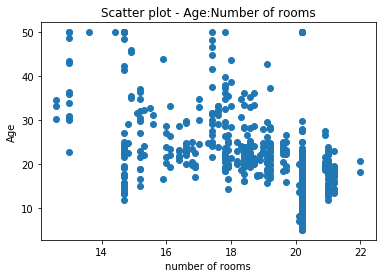

In [69]:
plt.scatter(boston_df.PTRATIO.values , boston_df.Prices.values)
plt.xlabel("number of rooms")
plt.ylabel("Age")
plt.title('Scatter plot - Age:Number of rooms')

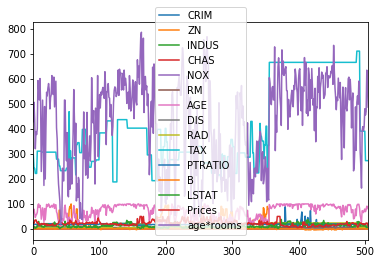

In [70]:
# use pandas plot
boston_df.plot()

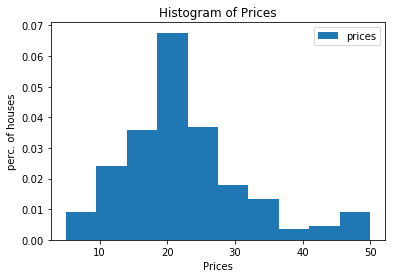

In [71]:
plt.hist(boston_df.Prices.values, label="prices", normed=1)
plt.legend()
plt.xlabel("Prices")
plt.ylabel("perc. of houses")
plt.title('Histogram of Prices')
plt.show()

In [72]:
from sklearn import  linear_model as lr
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
# split to train\ test
rand_idx = np.random.permutation(boston_df.index)
print len(rand_idx)
train_idx = rand_idx[:400]
test_idx = rand_idx[400:]
df_train = boston_df.loc[train_idx,:]
df_test = boston_df.loc[test_idx,:]

506


In [74]:
# split to x, y
y_train = df_train.Prices.values
x_train = df_train.drop(['Prices'], 1)
y_test = df_test.Prices.values
x_test = df_test.drop(['Prices'], 1)

In [75]:
# Run linear regression
regr = lr.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [ ]:
f_weights = pd.DataFrame(zip(regr.coef_, x_train.columns), columns=["weight", "feature"])
f_weights.sort_values(['weight'])

In [100]:
np.sum(f_weights.weight * x_test.iloc[0,:].values) + regr.intercept_

4.3508654644297984

In [103]:
y_pred[0]

4.3508654644297895

In [77]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_pred, y_test))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 19.30
Variance score: 0.74


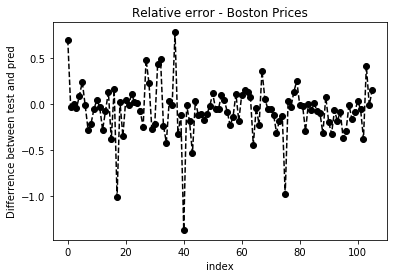

In [80]:
# Plot outputs
plt.plot((y_test-y_pred)/y_test, "--o",  color='black')
plt.xlabel('index')
plt.ylabel('Differrence between test and pred')
plt.title("Relative error - Boston Prices")